# Exercice Decision Tree Classifier

In [91]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# + autres choses 

### Importer les data et les afficher 

In [92]:
#data : http://archive.ics.uci.edu/ml/datasets/balance+scale
data = pd.read_csv('./balance-scale.csv', sep=';')
data.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


### Afficher une description des statistiques descriptives 

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


### Afficher la matrice de corrélation par rapport à la variable target  
Il est nécessaire d'encoder la variable cible avant d'afficher la matrice de corrélation. 

<AxesSubplot:>

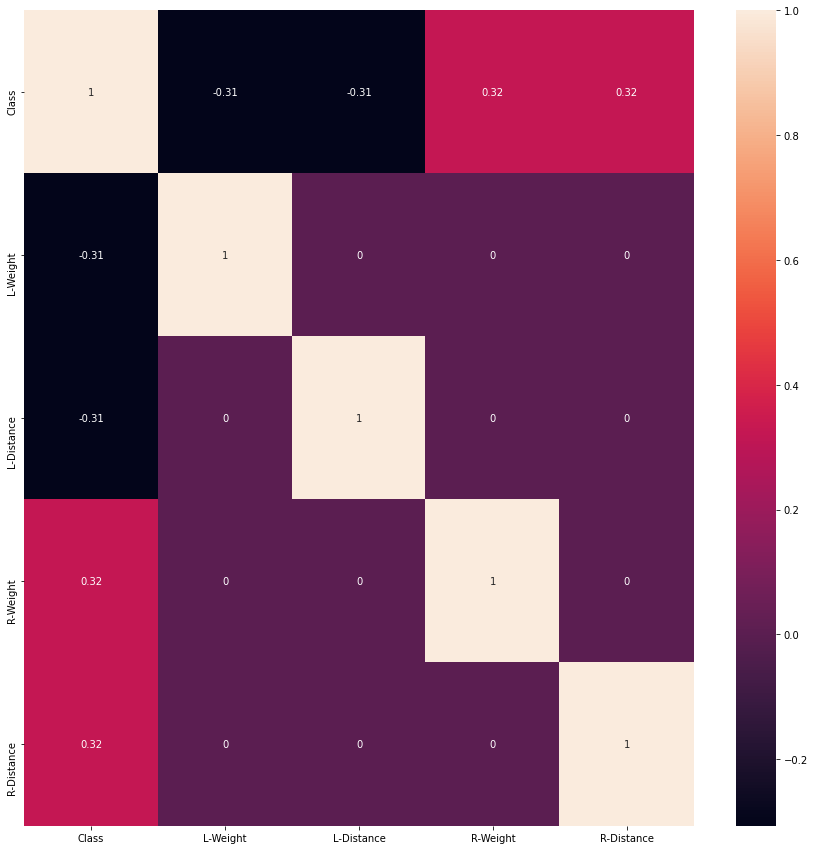

In [94]:
from sklearn.preprocessing import LabelEncoder

data['Class'] = LabelEncoder().fit_transform(data['Class'].tolist())

plt.figure(figsize= (15, 15))
sns.heatmap(data.corr(), annot=True)

### Afficher la taille & la shape du dataset

In [95]:
#Taille du dataset ::  625
#Shape du dataset ::  (625, 5)

print("Taille du dataset ::", len(data))
print("Shape du dataset ::", data.shape)

Taille du dataset :: 625
Shape du dataset :: (625, 5)


### Séparer le dataset en deux array X et Y  
**X désignant les variables explicatives / features** & **Y la variable cible / target**

In [96]:
y = data['Class']
X = data.drop(['Class'], axis = 1)

### Spliter le dataset (70/30) avec un random_state=42

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Instancier un  'DecisionTreeClassifier' avec un critère de décision GINI

In [98]:
#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            #max_features=None, max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=5, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            #splitter='best')
            
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)
clf_gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [99]:
FEATURE_NAMES = X.columns
FEATURE_NAMES

Index(['L-Weight', 'L-Distance', 'R-Weight', 'R-Distance'], dtype='object')

### Afficher votre arbre

In [100]:
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz

clf_gini.fit(X_train, y_train)

#tree.plot_tree(clf_gini)
dot_data_gini = export_graphviz(clf_gini, 'tree_gini.dot', feature_names = FEATURE_NAMES)

In [101]:
graph = graphviz.Source(dot_data_gini) #<graphviz.files.Source at 0x1a1e5cd630>

### Instancier un  'DecisionTreeClassifier' avec un critère de décision "d'information gain"

In [102]:
#DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            #max_features=None, max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=5, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            #splitter='best')
            
from sklearn.tree import DecisionTreeClassifier

clf_gain = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=100)
clf_gain

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

### Afficher votre arbre

In [103]:
#GraphViz Online

from sklearn import tree
from sklearn.tree import export_graphviz

clf_gain.fit(X_train, y_train)

#tree.plot_tree(clf_gain) 
dot_data_entropy = export_graphviz(clf_gain, 'tree_entropy.dot', feature_names = FEATURE_NAMES) 

In [104]:
graph = graphviz.Source(dot_data_entropy) #<graphviz.files.Source at 0x1a1e5cd9b0>

### Vérifier que l'individue X_new est bien classé "Right"
```où X_new est l'observation [4, 4, 3, 3] ``` 

### Effectuer une prediction du classifieur GINI sur l'ensemble de test

In [87]:
pred_gini = clf_gini.predict(X_test)
pred_gini

array([1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1])

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

### Effectuer une prediction du classifieur ENTROPY sur l'ensemble de test

In [88]:
pred_gain = clf_gain.predict(X_test)
pred_gain

array([1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1])

### Effectuer une comparaison entre les classifieurs GINI & ENTROPY 
On prendra pour temoin le dataset de test 

Sur l'ensemble de test (taille 188), il y a 25 éléments classés différemment.
Soit 13.3% de différence


### Donner l'accuracy du classifieur GINI 

In [15]:
print('Accuracy in percent = ',score(pred_gini, y_test)*100)

Accuracy du classifieur Gini : 73.404%


### Donner l'accuracy du classifieur ENTROPY 

In [16]:
print('Accuracy in percent = ',score(pred_gain, y_test)*100)

Accuracy du classifieur Entropy\Information Gain : 70.745%


### Afficher la matrice de confusion du classifieur GINI